# Analyses, visualisation et préparation des données

In [1]:
from sqlalchemy import create_engine
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Extraction des données depuis les tables sql

### Ouverture de la bdd

In [2]:
# Définition des parametres de connexion Ã  la base de donnÃ©es
username = 'postgres'
password = 'admin'
host = 'localhost'
port = '5432'
dbname = 'preventive_maintenance'

# Configuration de la connexion Ã  la base de donnÃ©es PostgreSQL
connection_str = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{dbname}'
engine = create_engine(connection_str, echo = False)

## statistique de base et Analyse univarié sur les diférentes data

### aeronefs

In [3]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM aeronefs
        """
df_aeronefs = pd.read_sql(query, engine)

In [4]:
df_aeronefs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ref_aero        231 non-null    object        
 1   type_model      231 non-null    object        
 2   debut_service   231 non-null    object        
 3   last_maint      231 non-null    object        
 4   en_maintenance  231 non-null    bool          
 5   end_maint       15 non-null     datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 9.4+ KB


In [5]:
#conversion des type dans le datafrmae
df_aeronefs['debut_service'] = pd.to_datetime(df_aeronefs['debut_service'])
df_aeronefs['last_maint'] = pd.to_datetime(df_aeronefs['last_maint'])
df_aeronefs['end_maint'] = pd.to_datetime(df_aeronefs['end_maint'])

In [6]:
df_aeronefs.describe().T

,count,mean,min,25%,50%,75%,max
debut_service,231,2011-01-24 03:50:38.961038848,2000-02-03 00:00:00,2004-12-20 00:00:00,2010-09-26 00:00:00,2017-06-27 00:00:00,2022-11-11 00:00:00
last_maint,231,2024-04-11 03:19:28.831168768,2023-07-02 00:00:00,2024-02-20 00:00:00,2024-05-31 00:00:00,2024-06-01 00:00:00,2024-06-02 00:00:00
end_maint,15,2024-06-05 07:48:59.999999744,2024-06-03 14:13:00,2024-06-03 14:13:00,2024-06-03 14:13:00,2024-06-03 14:13:00,2024-06-16 14:13:00


In [7]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6356,E170,2000-03-17,2024-03-27,False,NaT
1,B767_2803,B767,2020-12-03,2024-06-01,False,NaT
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04,False,NaT
4,B777_4029,B777,2009-01-01,2024-06-01,False,NaT


#### analyse des distributions

C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

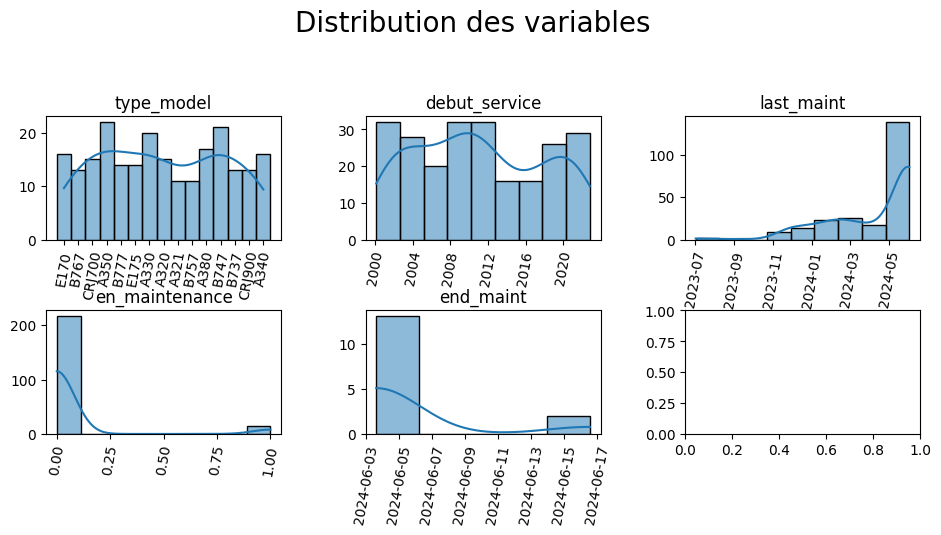

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_aeronefs.columns[1:]):
    sns.histplot(df_aeronefs[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')



plt.show()

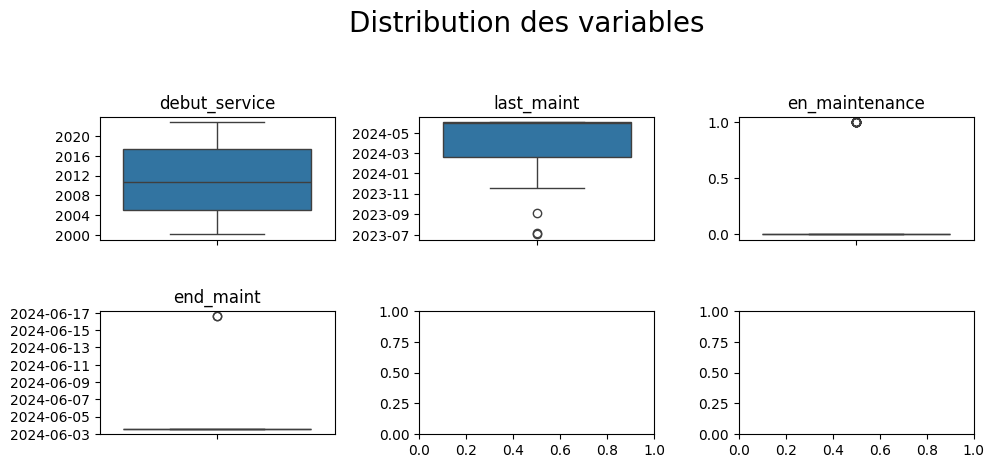

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_aeronefs.columns[2:]):
    sns.boxplot(df_aeronefs[col],  ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

### composants

In [10]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM composants
        """
df_composants = pd.read_sql(query, engine)

In [11]:
df_composants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ref_compo          10395 non-null  object 
 1   categorie          10395 non-null  object 
 2   aero               10395 non-null  object 
 3   desc_compo         10395 non-null  object 
 4   lifespan           10395 non-null  int64  
 5   taux_usure_actuel  10395 non-null  float64
 6   cout               10395 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 568.6+ KB


In [12]:
df_composants.describe().T

,count,mean,std,min,25%,50%,75%,max
lifespan,10395.0,13571.933333,8481.016341,10023.00,11015.000000,12643.000000,13626.000000,68978.00000
taux_usure_actuel,10395.0,31.117382,17.294406,0.11,16.350662,31.130527,45.945664,68.91093
cout,10395.0,11420.044444,5763.305465,2021.00,4801.000000,12664.000000,16266.000000,19492.00000


In [13]:
df_composants.head()

,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362


C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() 

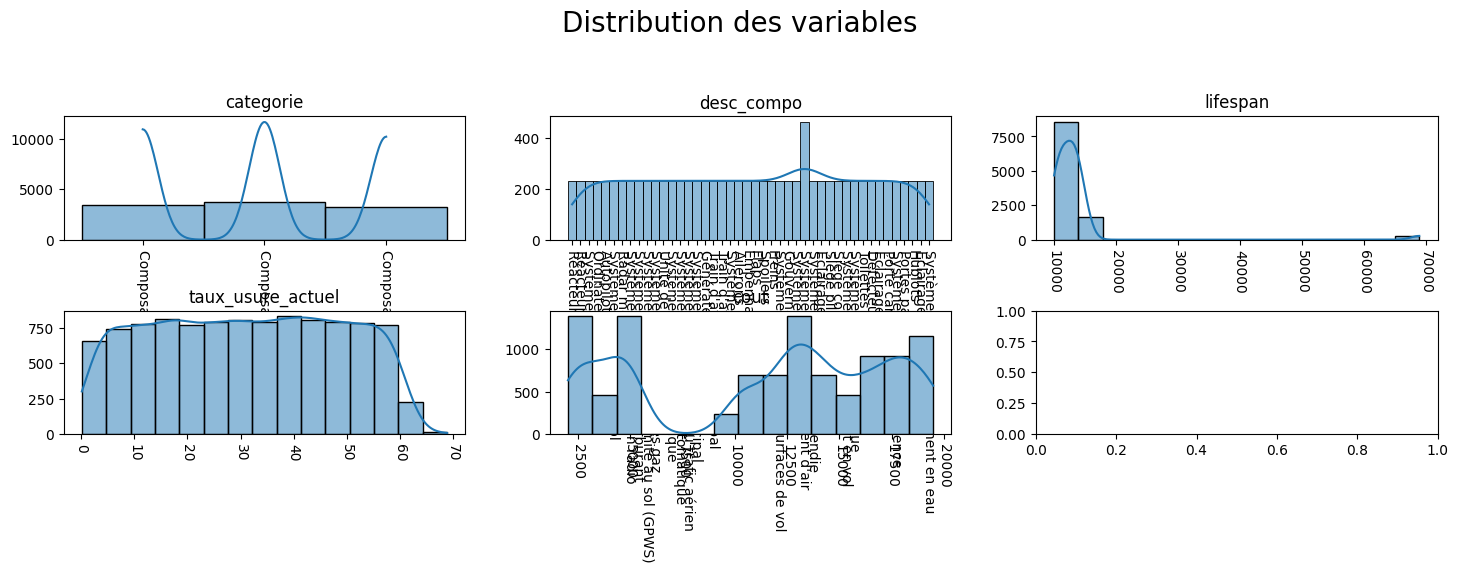

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['categorie', 'desc_compo', 'lifespan', 'taux_usure_actuel', 'cout']):
    sns.histplot(df_composants[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')



plt.show()

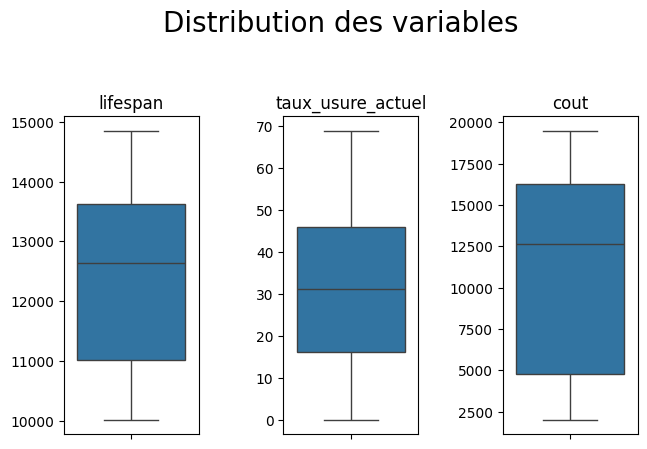

In [15]:
fig2, axes = plt.subplots(1, 3, figsize=(7, 5))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['lifespan', 'taux_usure_actuel', 'cout']):
    sns.boxplot(df_composants[col],  ax=axes[i], showfliers=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

### degradations

In [16]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM degradations
        """
df_degradations = pd.read_sql(query, engine)

In [17]:
df_degradations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104715 entries, 0 to 104714
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   clef              104715 non-null  object 
 1   ref_deg           104715 non-null  object 
 2   linked_aero       104715 non-null  object 
 3   compo_concerned   104715 non-null  object 
 4   usure_nouvelle    104715 non-null  float64
 5   measure_day       104715 non-null  object 
 6   need_replacement  104715 non-null  bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 4.9+ MB


In [18]:
#conversion des type dans le datafrmae
df_degradations['measure_day'] = pd.to_datetime(df_degradations['measure_day'])

In [19]:
df_degradations.describe().T

,count,mean,min,25%,50%,75%,max,std
usure_nouvelle,104715.0,34.988604,0.11,19.974655,35.07738,49.819519,100.0,17.712126
measure_day,104715,2024-06-13 12:18:52.445208576,2023-07-07 00:00:00,2024-06-08 00:00:00,2024-06-14 00:00:00,2024-06-20 00:00:00,2024-06-25 00:00:00,NaN


In [20]:
df_degradations.head()

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D001982CRJ700_6943SYSCRJ700-CRJ700_6943-292024...,D001982,CRJ700_6943,SYSCRJ700-CRJ700_6943-29,16.941998,2024-06-02,False
1,D006903CRJ700_6943ECLCRJ700-CRJ700_6943-302024...,D006903,CRJ700_6943,ECLCRJ700-CRJ700_6943-30,37.833502,2024-06-02,False
2,D006211CRJ700_6943SIECRJ700-CRJ700_6943-312024...,D006211,CRJ700_6943,SIECRJ700-CRJ700_6943-31,31.790628,2024-06-02,False
3,D001241CRJ700_6943SIECRJ700-CRJ700_6943-322024...,D001241,CRJ700_6943,SIECRJ700-CRJ700_6943-32,21.109600,2024-06-02,False
4,D007864CRJ700_6943SYSCRJ700-CRJ700_6943-332024...,D007864,CRJ700_6943,SYSCRJ700-CRJ700_6943-33,19.159930,2024-06-02,False


C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)


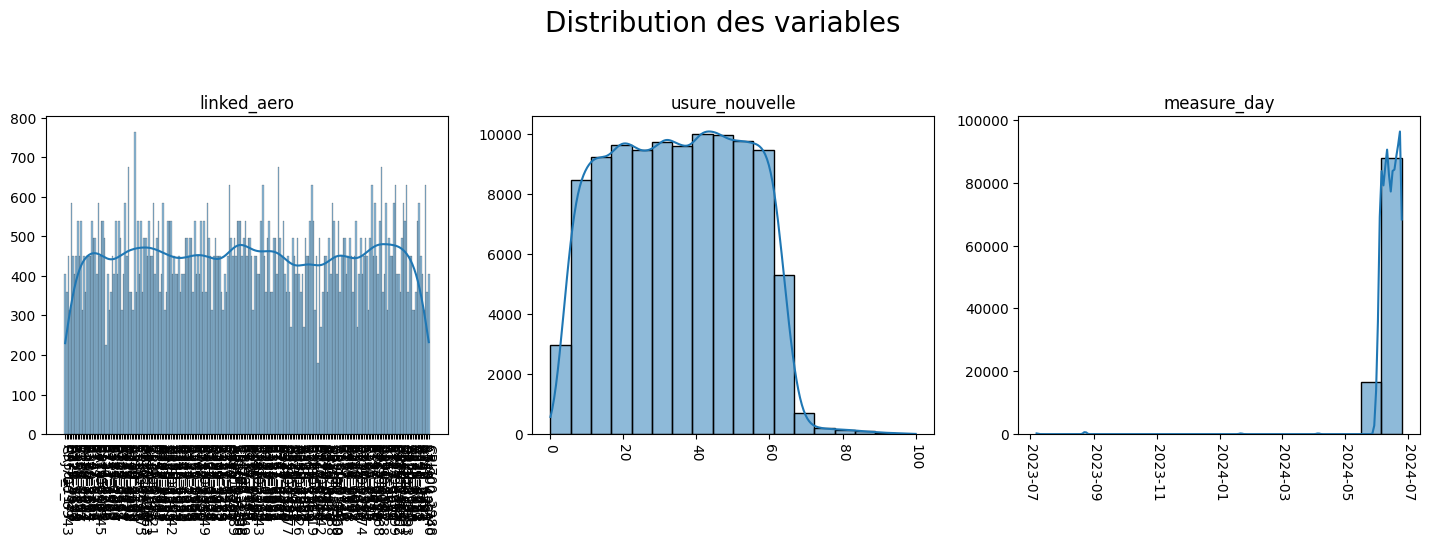

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['linked_aero', 'usure_nouvelle', 'measure_day']):
    sns.histplot(df_degradations[col], bins='sturges', kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

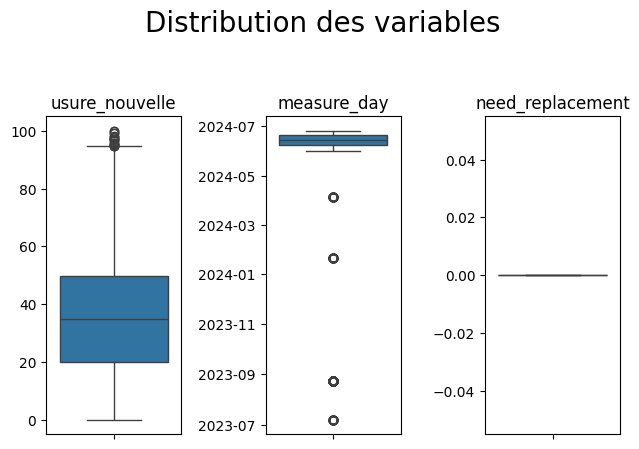

In [22]:
fig2, axes = plt.subplots(1, 3, figsize=(7, 5))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['usure_nouvelle', 'measure_day', 'need_replacement']):
    sns.boxplot(df_degradations[col],  ax=axes[i], showfliers=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

### logs_vols

In [23]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM logs_vols
        """
df_logs_vols = pd.read_sql(query, engine)

In [24]:
df_logs_vols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ref_vol          2217 non-null   object 
 1   aero_linked      2217 non-null   object 
 2   jour_vol         2217 non-null   object 
 3   time_en_air      2217 non-null   float64
 4   sensor_data      2217 non-null   object 
 5   etat_voyant      2217 non-null   int64  
 6   temp             2217 non-null   float64
 7   temp_unit        2217 non-null   object 
 8   pressure         2217 non-null   float64
 9   pressure_unit    2217 non-null   object 
 10  vibrations       2217 non-null   float64
 11  vibrations_unit  2217 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 208.0+ KB


In [25]:
df_logs_vols['jour_vol'] = pd.to_datetime(df_logs_vols['jour_vol'])

In [26]:
df_logs_vols.describe().T

,count,mean,min,25%,50%,75%,max,std
jour_vol,2217,2024-06-14 17:38:04.709066240,2024-06-04 00:00:00,2024-06-09 00:00:00,2024-06-15 00:00:00,2024-06-21 00:00:00,2024-06-25 00:00:00,NaN
time_en_air,2217.0,5.152368,0.6,3.4,5.1,6.9,13.0,2.447815
etat_voyant,2217.0,0.152458,0.0,0.0,0.0,0.0,3.0,0.398819
temp,2217.0,0.200135,-36.5,-6.3,0.3,6.4,32.4,9.870747
pressure,2217.0,950.830311,757.3,917.4,952.0,984.1,1109.5,50.190186
vibrations,2217.0,2.540148,0.006899,1.2752,2.554772,3.822807,4.996703,1.452028


In [27]:
df_logs_vols.head()

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit
0,V06783026,A320_6242,2024-06-04,6.2,"{'temp': '-14.7°C', 'pressure': '1009.1 hPa', ...",1,-14.7,°C,1009.1,hPa,0.015340,m/s²
1,V06810954,A380_5199,2024-06-04,2.1,"{'temp': '2.9°C', 'pressure': '1015.8 hPa', 'v...",0,2.9,°C,1015.8,hPa,2.317764,m/s²
2,V05201226,A350_3122,2024-06-04,7.7,"{'temp': '8.0°C', 'pressure': '934.2 hPa', 'vi...",0,8.0,°C,934.2,hPa,1.999378,m/s²
3,V05582404,B747_3165,2024-06-04,8.3,"{'temp': '7.3°C', 'pressure': '999.9 hPa', 'vi...",0,7.3,°C,999.9,hPa,0.875383,m/s²
4,V01713095,A350_6452,2024-06-04,9.8,"{'temp': '-11.4°C', 'pressure': '946.7 hPa', '...",0,-11.4,°C,946.7,hPa,1.551531,m/s²


C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_28824\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

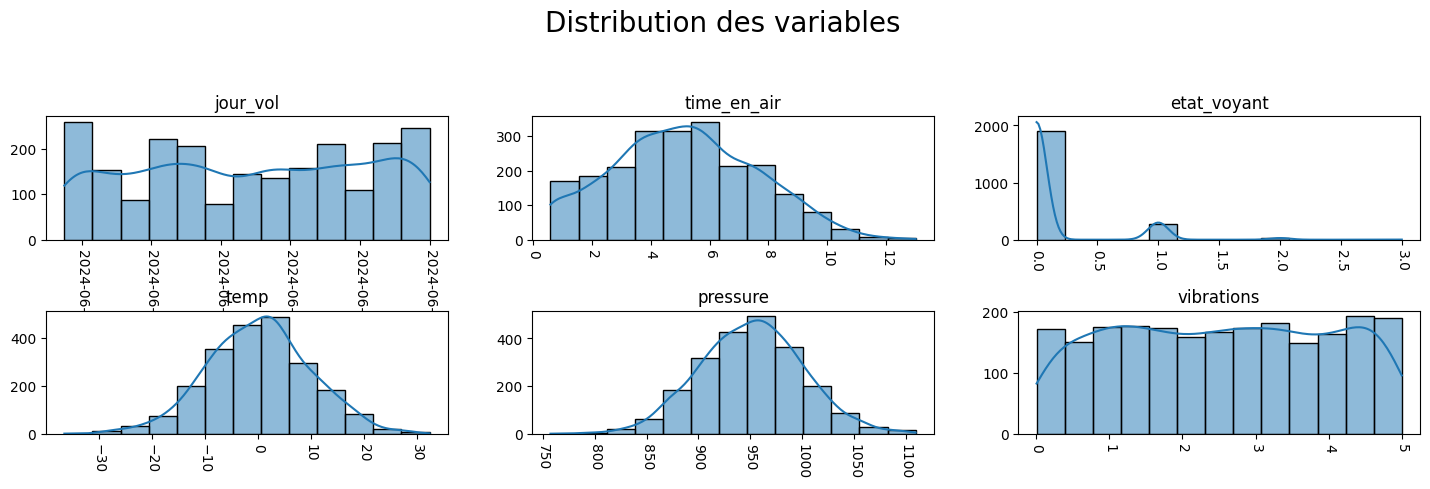

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['jour_vol', 'time_en_air', 'etat_voyant', 'temp', 'pressure', 'vibrations']):
    sns.histplot(df_logs_vols[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

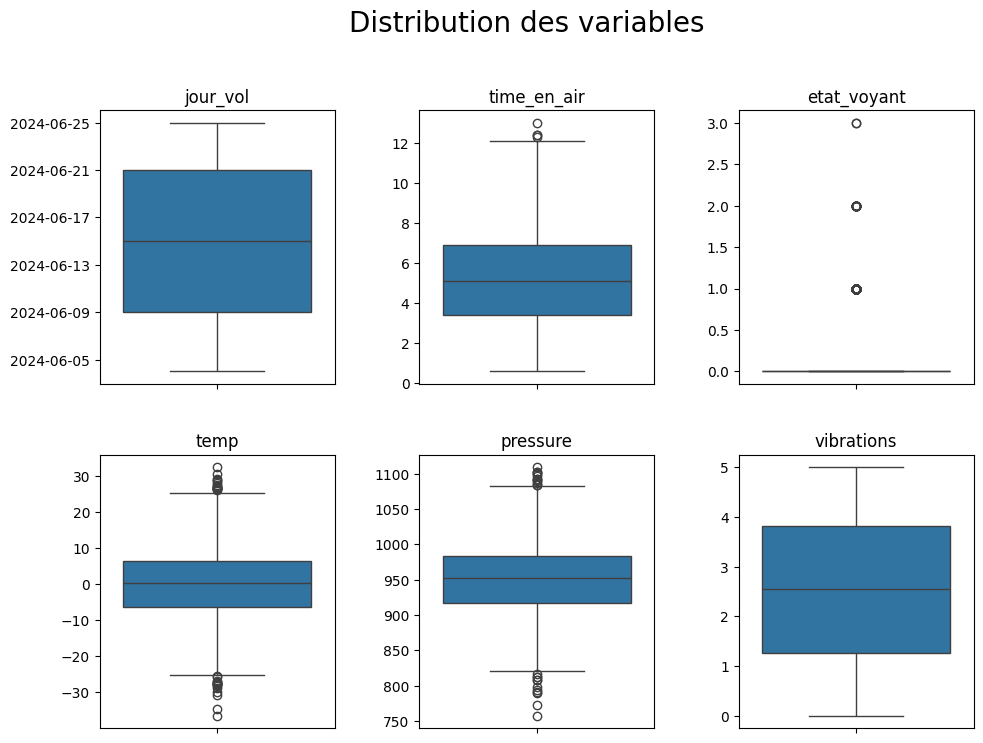

In [29]:
fig2, axes = plt.subplots(2, 3, figsize=(10, 8))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['jour_vol', 'time_en_air', 'etat_voyant', 'temp', 'pressure', 'vibrations']):
    sns.boxplot(df_logs_vols[col],  ax=axes[i//3, i%3], showfliers=True)
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

## Merge des dataFrame

In [30]:
df_aeronefs.head(1)

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6356,E170,2000-03-17,2024-03-27,False,NaT


In [31]:
df_composants.head(1)

,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552


In [32]:
df_degradations.head(1)

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D001982CRJ700_6943SYSCRJ700-CRJ700_6943-292024...,D001982,CRJ700_6943,SYSCRJ700-CRJ700_6943-29,16.941998,2024-06-02,False


In [33]:
df_logs_vols.head(1)

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit
0,V06783026,A320_6242,2024-06-04,6.2,"{'temp': '-14.7°C', 'pressure': '1009.1 hPa', ...",1,-14.7,°C,1009.1,hPa,0.01534,m/s²


In [34]:
merge1 = pd.merge(left= df_aeronefs, right= df_composants, how= 'outer', left_on= 'ref_aero', right_on= 'aero')

In [35]:
merge1.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,REAA320-A320_1884-0,Composants Critiques,A320_1884,Réacteur gauche,13045.0,10.849690,15552.0
1,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,REAA320-A320_1884-1,Composants Critiques,A320_1884,Réacteur droit,13626.0,42.107332,17559.0
2,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,SYSA320-A320_1884-2,Composants Critiques,A320_1884,Système de navigation,10541.0,14.454362,16514.0
3,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,ORDA320-A320_1884-3,Composants Critiques,A320_1884,Ordinateur de vol,10441.0,35.506162,16047.0
4,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AUTA320-A320_1884-4,Composants Critiques,A320_1884,Autopilote,14847.0,29.087454,19362.0


In [36]:
merge1[merge1['ref_compo'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
9630,E170_6356,E170,2000-03-17,2024-03-27,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# merge1 = merge1.dropna(subset=['ref_compo'])

In [38]:
merge1.isnull().sum()

ref_aero               45
type_model             45
debut_service          45
last_maint             45
en_maintenance         45
end_maint            9721
ref_compo               1
categorie               1
aero                    1
desc_compo              1
lifespan                1
taux_usure_actuel       1
cout                    1
dtype: int64

In [39]:
merge2 = pd.merge(left= df_degradations, right= merge1, how= 'outer', left_on= 'compo_concerned', right_on= 'ref_compo')

In [40]:
merge2.head()

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,D002776A320_1884AILA320-A320_1884-202024-06-04,D002776,A320_1884,AILA320-A320_1884-20,24.424320,2024-06-04,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0
1,D002776A320_1884AILA320-A320_1884-202024-06-05,D002776,A320_1884,AILA320-A320_1884-20,25.203096,2024-06-05,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0
2,D002776A320_1884AILA320-A320_1884-202024-06-08,D002776,A320_1884,AILA320-A320_1884-20,25.466196,2024-06-08,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0
3,D002776A320_1884AILA320-A320_1884-202024-06-10,D002776,A320_1884,AILA320-A320_1884-20,25.529340,2024-06-10,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0
4,D002776A320_1884AILA320-A320_1884-202024-06-14,D002776,A320_1884,AILA320-A320_1884-20,25.908204,2024-06-14,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0


In [41]:
merge2.isna().sum()

clef                     1
ref_deg                  1
linked_aero              1
compo_concerned          1
usure_nouvelle           1
measure_day              1
need_replacement         1
ref_aero               450
type_model             450
debut_service          450
last_maint             450
en_maintenance         450
end_maint            98821
ref_compo                1
categorie                1
aero                     1
desc_compo               1
lifespan                 1
taux_usure_actuel        1
cout                     1
dtype: int64

In [42]:
merge2[merge2['ref_aero'].isna()]

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
2162,D003686E170_6353AILE170-E170_6353-202024-06-04,D003686,E170_6353,AILE170-E170_6353-20,51.555456,2024-06-04,False,NaN,NaN,NaT,NaT,NaN,NaT,AILE170-E170_6353-20,Composants Majeurs,E170_6353,Ailerons,10524.0,50.8293,10290.0
2163,D003686E170_6353AILE170-E170_6353-202024-06-06,D003686,E170_6353,AILE170-E170_6353-20,51.744888,2024-06-06,False,NaN,NaN,NaT,NaT,NaN,NaT,AILE170-E170_6353-20,Composants Majeurs,E170_6353,Ailerons,10524.0,50.8293,10290.0
2164,D003686E170_6353AILE170-E170_6353-202024-06-07,D003686,E170_6353,AILE170-E170_6353-20,52.786764,2024-06-07,False,NaN,NaN,NaT,NaT,NaN,NaT,AILE170-E170_6353-20,Composants Majeurs,E170_6353,Ailerons,10524.0,50.8293,10290.0
2165,D003686E170_6353AILE170-E170_6353-202024-06-11,D003686,E170_6353,AILE170-E170_6353-20,53.491872,2024-06-11,False,NaN,NaN,NaT,NaT,NaN,NaT,AILE170-E170_6353-20,Composants Majeurs,E170_6353,Ailerons,10524.0,50.8293,10290.0
2166,D003686E170_6353AILE170-E170_6353-202024-06-12,D003686,E170_6353,AILE170-E170_6353-20,54.218028,2024-06-12,False,NaN,NaN,NaT,NaT,NaN,NaT,AILE170-E170_6353-20,Composants Majeurs,E170_6353,Ailerons,10524.0,50.8293,10290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104555,D000695E170_6353UNIE170-E170_6353-112024-06-16,D000695,E170_6353,UNIE170-E170_6353-11,33.810088,2024-06-16,False,NaN,NaN,NaT,NaT,NaN,NaT,UNIE170-E170_6353-11,Composants Critiques,E170_6353,Unité de gestion de l'air,13224.0,28.3618,17834.0
104556,D000695E170_6353UNIE170-E170_6353-112024-06-19,D000695,E170_6353,UNIE170-E170_6353-11,34.087792,2024-06-19,False,NaN,NaN,NaT,NaT,NaN,NaT,UNIE170-E170_6353-11,Composants Critiques,E170_6353,Unité de gestion de l'air,13224.0,28.3618,17834.0
104557,D000695E170_6353UNIE170-E170_6353-112024-06-20,D000695,E170_6353,UNIE170-E170_6353-11,35.000248,2024-06-20,False,NaN,NaN,NaT,NaT,NaN,NaT,UNIE170-E170_6353-11,Composants Critiques,E170_6353,Unité de gestion de l'air,13224.0,28.3618,17834.0
104558,D000695E170_6353UNIE170-E170_6353-112024-06-21,D000695,E170_6353,UNIE170-E170_6353-11,35.714344,2024-06-21,False,NaN,NaN,NaT,NaT,NaN,NaT,UNIE170-E170_6353-11,Composants Critiques,E170_6353,Unité de gestion de l'air,13224.0,28.3618,17834.0


In [43]:
merge3 = pd.merge(left= df_logs_vols, right= merge2, how= 'outer', left_on= 'aero_linked', right_on= 'linked_aero')

In [44]:
pd.set_option("display.max_columns", None)

In [45]:
merge3.head(1)

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,V03385610,A320_1884,2024-06-04,9.8,"{'temp': '4.3°C', 'pressure': '907.3 hPa', 'vi...",0.0,4.3,°C,907.3,hPa,1.763677,m/s²,D002776A320_1884AILA320-A320_1884-202024-06-04,D002776,A320_1884,AILA320-A320_1884-20,24.42432,2024-06-04,False,A320_1884,A320,2015-12-26,2024-06-01,False,NaT,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524.0,23.392968,10290.0


In [46]:
# drop des colonnes inutiles

merge3 = merge3.drop(['sensor_data', 'temp_unit', 'pressure_unit', 'vibrations_unit', 'ref_deg', 'linked_aero', 'ref_aero', 'ref_compo', 'aero'], axis=1)

merge3.isnull().sum()

ref_vol                   1
aero_linked               1
jour_vol                  1
time_en_air               1
etat_voyant               1
temp                      1
pressure                  1
vibrations                1
clef                      1
compo_concerned           1
usure_nouvelle            1
measure_day               1
need_replacement          1
type_model             4500
debut_service          4500
last_maint             4500
en_maintenance         4500
end_maint            996571
categorie                 1
desc_compo                1
lifespan                  1
taux_usure_actuel         1
cout                      1
dtype: int64

In [47]:
merge3.shape

(1047376, 23)